In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("../data/logfile-storage-v5.csv", delimiter=";")
duration = float(dataset['duration'][0])
dataset.head()

,datacenter_id,datacenter_name,datacenter_storage_energy,storage_id,system,storage_capacity,capacity_used,active_duration,idle_intervals,duration,total_energy_active,total_energy_idle,average_rotation_latency,average_seek_Time,max_internal_data_transfer_rate,is_active,idle_power,active_power,files,Unnamed: 19
0,3,Datacenter_1,4.099681e+06,0,storage,900000.0,899584.0,4635.372761,1.0000003378537212:,9447.595287,26885.162012,3.000001,0.003,0.004,198.0,False,3.0,5.8,"55596,3072,15.524809784082704:450990,1024,5.18...",NaN
1,3,Datacenter_1,4.099681e+06,1,storage,900000.0,899584.0,4552.153376,1.0000000057506384:,9447.595287,26402.489581,3.000000,0.003,0.004,198.0,False,3.0,5.8,"1002363,1024,5.178738666087011:287333,512,2.59...",NaN
2,3,Datacenter_1,4.099681e+06,2,storage,900000.0,899584.0,4712.463046,1.0000000137015315:,9447.595287,27332.285668,3.000000,0.003,0.004,198.0,False,3.0,5.8,"3-6852,8192,41.38862101694565:24-285602,512,2....",NaN
3,3,Datacenter_1,4.099681e+06,3,storage,900000.0,899584.0,4924.857340,1.0000000205963306:,9447.595287,28564.172570,3.000000,0.003,0.004,198.0,False,3.0,5.8,"303602,3584,18.10363760760568:1-591519,3072,15...",NaN
4,3,Datacenter_1,4.099681e+06,4,storage,900000.0,899584.0,4813.303893,1.000000024323157:,9447.595287,27917.162579,3.000000,0.003,0.004,198.0,False,3.0,5.8,"2-878359,1024,5.1852412125875285:2-1002249,102...",NaN


The datacenter 'Datacenter_1' current persistent storage infrastructure at max can consume 0.11019999999999999 Kilo Joules (kJ/s) per second.


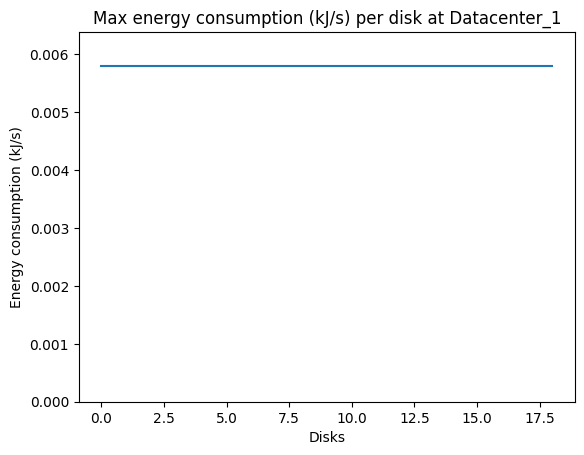

Datacenter_1's current persistent storage infrastructure can at max consume 1041.1250006461203 Kilo Joules (kJ) over the duration 9447.595287169874.


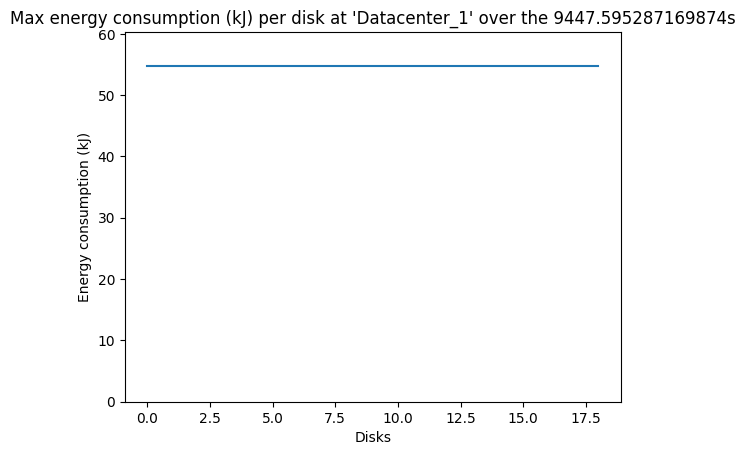

The datacenter 'Datacenter_1' current persistent storage infrastructure state is consuming 0.11019999999999999 Kilo Joules (kJ/s) per second.


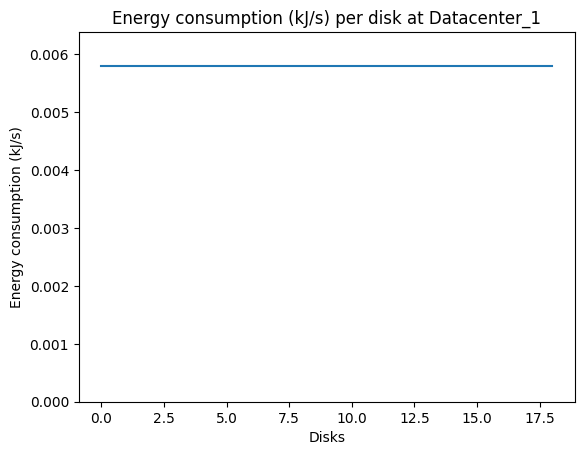

Datacenter_1's current persistent storage infrastructure has consumed 790.086001887893 Kilo Joules (kJ) over the duration 9447.595287169874.


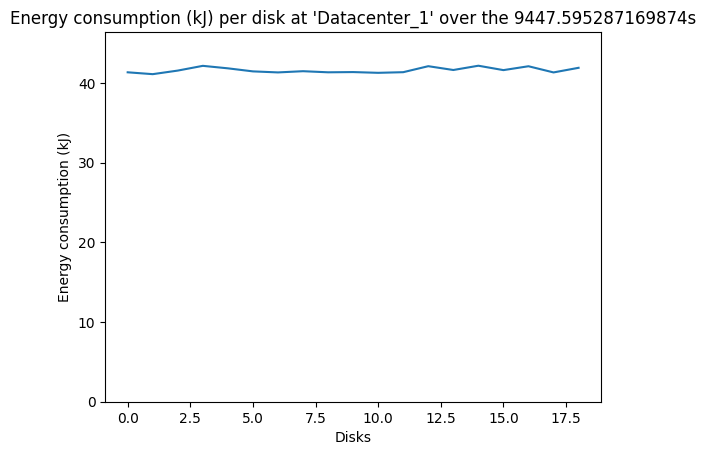

The datacenter 'Datacenter_2' current persistent storage infrastructure at max can consume 0.15778 Kilo Joules (kJ/s) per second.


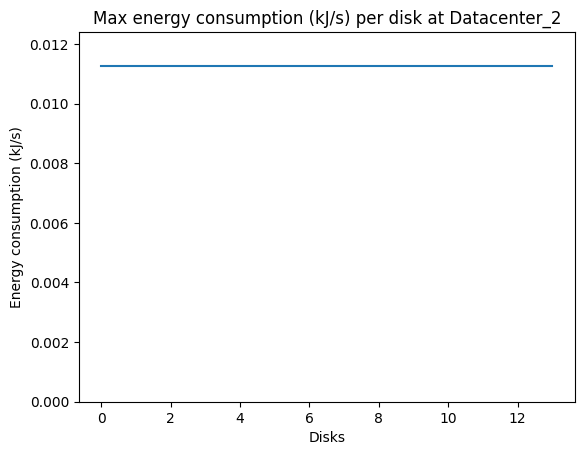

Datacenter_2's current persistent storage infrastructure can at max consume 1490.6415844096625 Kilo Joules (kJ) over the duration 9447.595287169874.


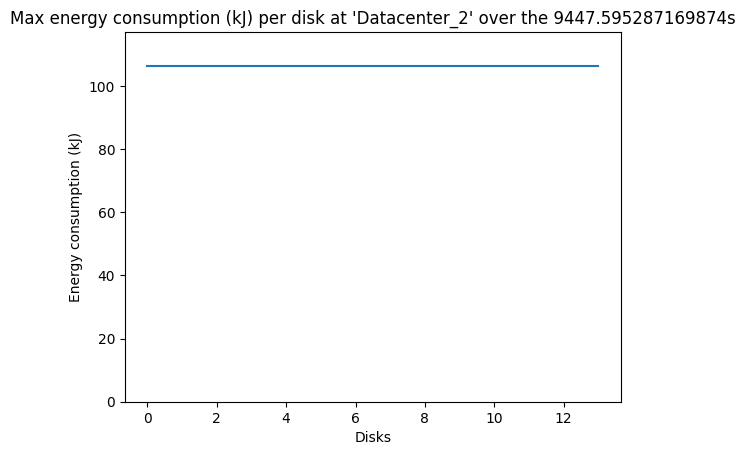

The datacenter 'Datacenter_2' current persistent storage infrastructure state is consuming 0.15778 Kilo Joules (kJ/s) per second.


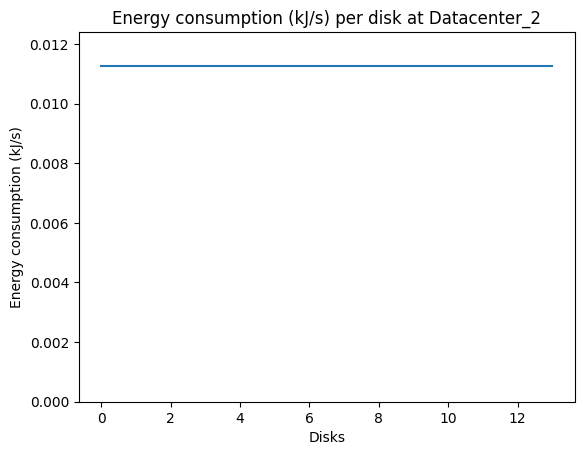

Datacenter_2's current persistent storage infrastructure has consumed 1395.6595898006544 Kilo Joules (kJ) over the duration 9447.595287169874.


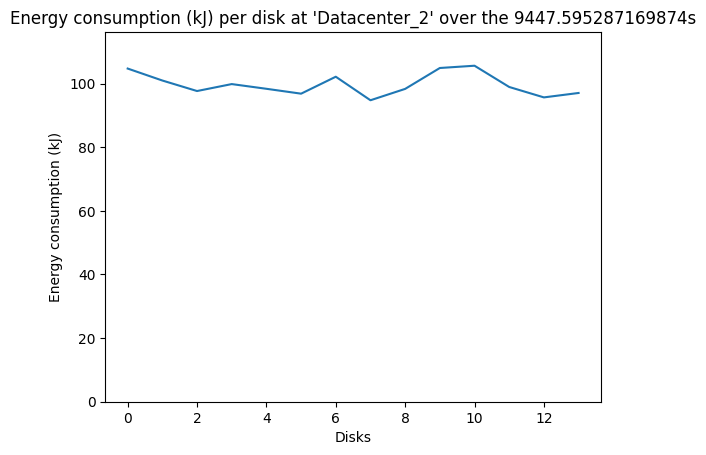

The datacenter 'Datacenter_3' current persistent storage infrastructure at max can consume 0.1582 Kilo Joules (kJ/s) per second.


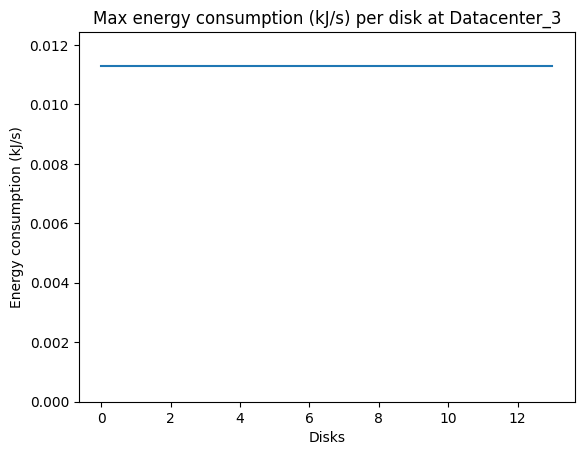

Datacenter_3's current persistent storage infrastructure can at max consume 1494.6095744302738 Kilo Joules (kJ) over the duration 9447.595287169874.


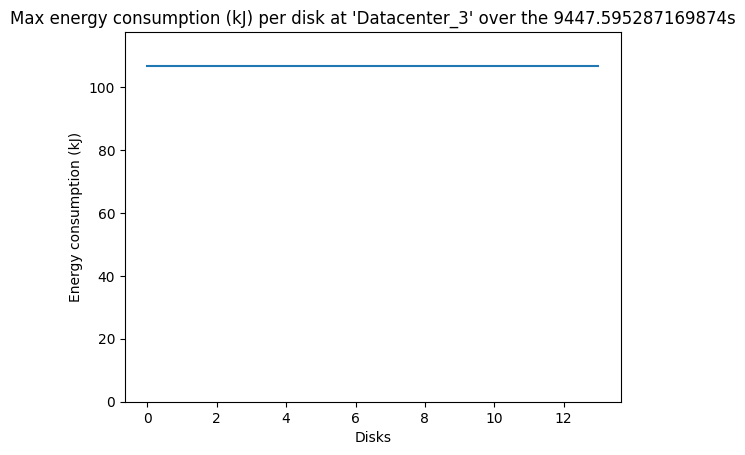

The datacenter 'Datacenter_3' current persistent storage infrastructure state is consuming 0.1582 Kilo Joules (kJ/s) per second.


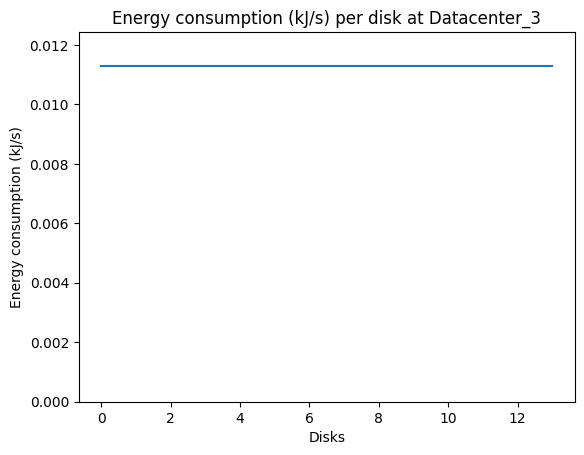

Datacenter_3's current persistent storage infrastructure has consumed 1377.540181529556 Kilo Joules (kJ) over the duration 9447.595287169874.


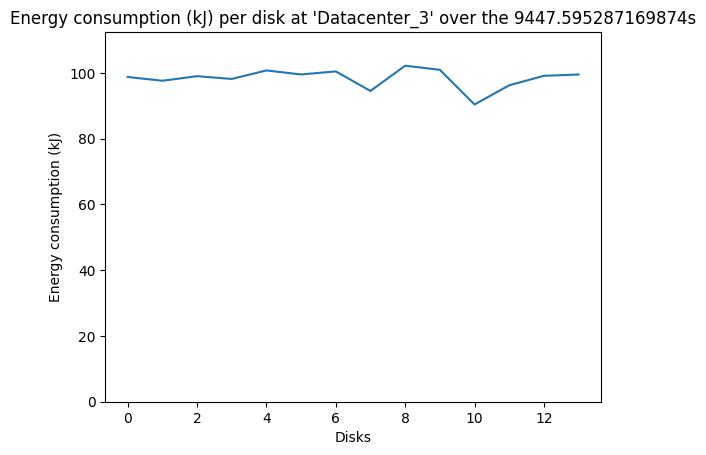

The datacenter 'Datacenter_4' current persistent storage infrastructure at max can consume 0.11954999999999999 Kilo Joules (kJ/s) per second.


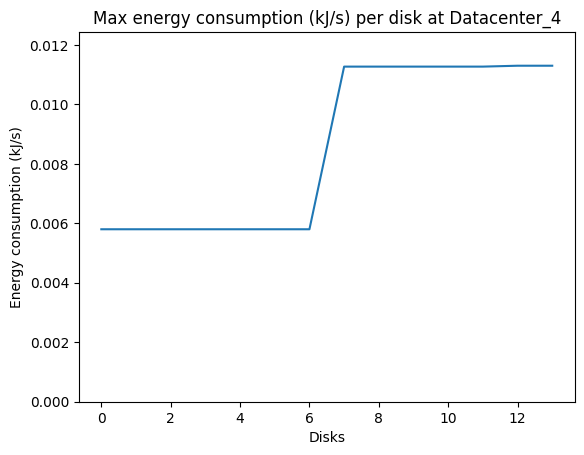

Datacenter_4's current persistent storage infrastructure can at max consume 1129.4600165811585 Kilo Joules (kJ) over the duration 9447.595287169874.


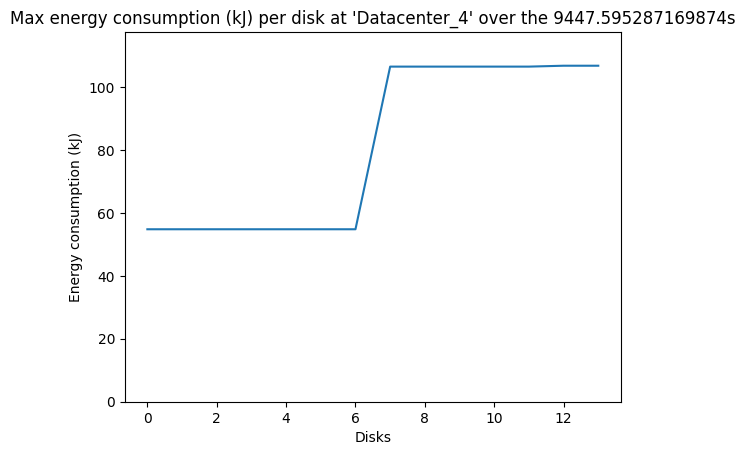

The datacenter 'Datacenter_4' current persistent storage infrastructure state is consuming 0.11954999999999999 Kilo Joules (kJ/s) per second.


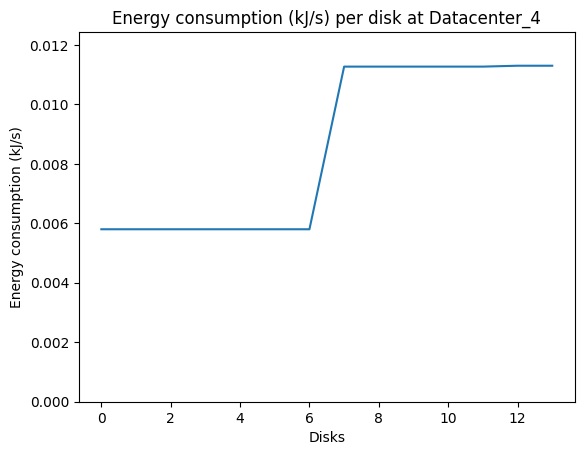

Datacenter_4's current persistent storage infrastructure has consumed 992.3175621368678 Kilo Joules (kJ) over the duration 9447.595287169874.


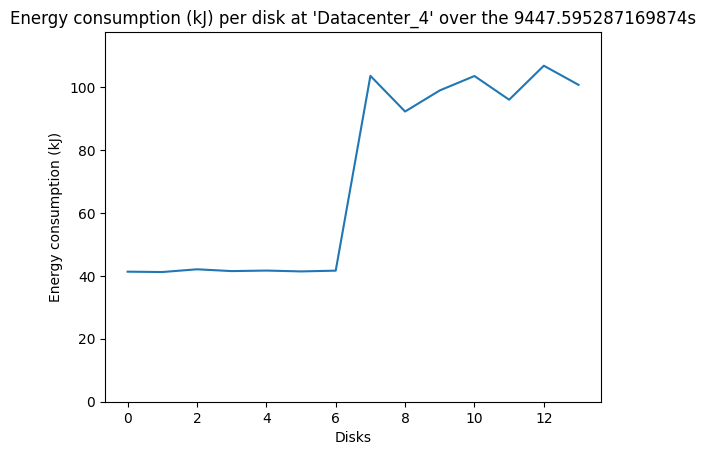

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


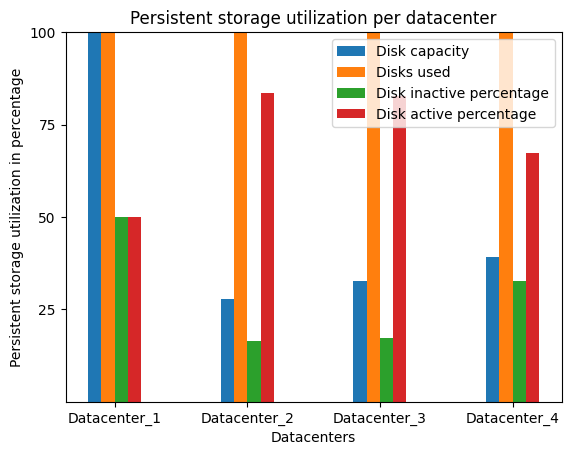

In [29]:
labels, values = np.unique(dataset['datacenter_name'], return_counts=True)
datacenter_total_storage_capacity = np.array([])
datacenter_used_storage_capacity = np.array([])
datacenter_used_storage_capacity_power_state_aware = np.array([])

datacenter_total_duration = np.array([])
datacenter_inactive_duration = np.array([])
datacenter_active_duration = np.array([])

datacenter_disks = np.array([])
datacenter_disks_active = np.array([])
datacenter_disks_inactive = np.array([])
datacenter_disks_on = np.array([])
datacenter_disks_off = np.array([])

datacenter_max_power = np.array([])
datacenter_current_power = np.array([])
datacenter_max_power_duration = np.array([])
datacenter_current_power_duration = np.array([])


for i in range(len(labels)):
    total_storage_capacity = 0
    used_storage_capacity = 0
    used_storage_capacity_power_state_aware = 0
    
    total_disk_duration = 0
    disk_inactive_duration = 0
    disk_active_duration = 0
    
    disks = 0
    active_disks = 0
    inactive_disks = 0
    disks_on = 0
    disks_off = 0
    
    max_power = np.array([])
    current_power = np.array([])
    max_power_duration = np.array([])
    current_power_duration = np.array([])
    
    for index, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        disks += 1
        max_power = np.append(max_power, float(sample['active_power']))
        
        if sample['is_active'] == True or float(sample['active_duration']) > 0:
            active_disks += 1
            # used_storage_capacity_power_state_aware += sample['capacity_used']
            current_power = np.append(current_power, float(sample['active_power']))
            disks_on += 1
        else:
            inactive_disks += 1
            current_power = np.append(current_power, float(sample['idle_power']))
            disks_on += 1
            
        max_power_duration = np.append(max_power_duration,  float(sample['active_power']) * float(sample['duration']))
        current_power_duration = np.append(current_power_duration, float(sample['active_power']) * float(sample['active_duration']) + float(sample['idle_power']) * (float(sample['duration']) - float(sample['active_duration'])))
        
        if float(sample['active_duration']) == 0 or float(sample['capacity_used']) == 0:
            disks_off += 1
        
        total_storage_capacity += sample['storage_capacity']
        used_storage_capacity += sample['capacity_used']
        
        # idle_duration = 0
        # for idle_interval in sample['idle_intervals'].split(":"):
        #     if idle_interval != '':
        #         idle_duration += float(idle_interval)
        disk_inactive_duration += float(sample['duration']) - float(sample['active_duration'])
        disk_active_duration += float(sample['active_duration'])
        total_disk_duration += float(sample['duration'])
    
    datacenter_total_storage_capacity = np.append(datacenter_total_storage_capacity, total_storage_capacity)
    datacenter_used_storage_capacity = np.append(datacenter_used_storage_capacity, used_storage_capacity)
    
    datacenter_total_duration = np.append(datacenter_total_duration,  + total_disk_duration)
    datacenter_inactive_duration = np.append(datacenter_inactive_duration, disk_inactive_duration)
    datacenter_active_duration = np.append(datacenter_active_duration, disk_active_duration)

    datacenter_used_storage_capacity_power_state_aware = np.append(datacenter_used_storage_capacity_power_state_aware, used_storage_capacity_power_state_aware)
    datacenter_disks = np.append(datacenter_disks, disks)
    datacenter_disks_active = np.append(datacenter_disks_active, active_disks)
    datacenter_disks_inactive = np.append(datacenter_disks_inactive, inactive_disks)
    datacenter_disks_on = np.append(datacenter_disks_on, disks_on)
    datacenter_disks_off = np.append(datacenter_disks_off, disks_off)
    
    datacenter_max_power = np.append(datacenter_max_power, np.sum(max_power))
    datacenter_current_power = np.append(datacenter_current_power, np.sum(current_power))
    datacenter_max_power_duration = np.append(datacenter_max_power_duration, np.sum(max_power_duration))
    datacenter_current_power_duration = np.append(datacenter_current_power_duration, np.sum(current_power_duration))
    
    
    ###################### MAX POWER ###################### 
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure at max can consume {(np.sum(max_power) * 1)/1000} Kilo Joules (kJ/s) per second.")
    plt.plot(np.arange(0, len(max_power)), ((max_power*1)/1000))
    plt.ylim((0, (max(max_power) + (max(max_power) * 0.10))/1000))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (kJ/s)")
    plt.title(f"Max energy consumption (kJ/s) per disk at {labels[i]}")
    plt.savefig(f"../figs/storage/power/{labels[i]}_storage_max_power.eps", format="eps")
    plt.show()
    
    print(f"{labels[i]}'s current persistent storage infrastructure can at max consume {(np.sum(max_power_duration))/1000} Kilo Joules (kJ) over the duration {duration}.")
    plt.plot(np.arange(0, len(max_power_duration)), ((max_power_duration)/1000))
    plt.ylim((0, (max(max_power_duration) + (max(max_power_duration) * 0.10))/1000))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Max energy consumption (kJ) per disk at '{labels[i]}' over the {duration}s")
    plt.savefig(f"../figs/storage/power/{labels[i]}_storage_max_power_duration.eps", format="eps")
    plt.show()
    
    ###################### CURRENT POWER ######################
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure state is consuming {(np.sum(current_power) * 1)/1000} Kilo Joules (kJ/s) per second.")
    plt.plot(np.arange(0, len(current_power)), ((current_power*1)/1000))
    plt.ylim((0, (max(current_power) + (max(current_power) * 0.10))/1000))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (kJ/s)")
    plt.title(f"Energy consumption (kJ/s) per disk at {labels[i]}")
    plt.savefig(f"../figs/storage/power/{labels[i]}_storage_current_power.eps", format="eps")
    plt.show()
    
    print(f"{labels[i]}'s current persistent storage infrastructure has consumed {(np.sum(current_power_duration))/1000} Kilo Joules (kJ) over the duration {duration}.")
    plt.plot(np.arange(0, len(current_power_duration)), ((current_power_duration)/1000))
    plt.ylim((0, (max(current_power_duration) + (max(current_power_duration) * 0.10))/1000))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption (kJ) per disk at '{labels[i]}' over the {duration}s")
    plt.savefig(f"../figs/storage/power/{labels[i]}_storage_current_power_duration.eps", format="eps")
    plt.show()

x = np.arange(len(labels))

bar_width = 0.2
plt.bar(x - bar_width * 0.75, np.divide(datacenter_used_storage_capacity, datacenter_total_storage_capacity)*100, bar_width/2, label="Disk capacity")
plt.bar(x - bar_width * 0.25, np.divide(datacenter_disks_on, datacenter_disks)*100, bar_width/2, label="Disks used")
plt.bar(x + bar_width * 0.25, np.divide(datacenter_inactive_duration, datacenter_total_duration)*100, bar_width/2, label="Disk inactive percentage")
plt.bar(x + bar_width * 0.75, np.divide(datacenter_active_duration, datacenter_total_duration)*100, bar_width/2, label="Disk active percentage")

plt.xticks(x, labels)
plt.yticks([25, 50, 75, 100])
plt.ylim((0, 100))
plt.xlabel("Datacenters")
plt.ylabel("Persistent storage utilization in percentage")
plt.title("Persistent storage utilization per datacenter")
plt.legend()
plt.savefig("../figs/storage/storage_utilization/cloud_provider_storage_utilization_per_datacenter.eps", format="eps")
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


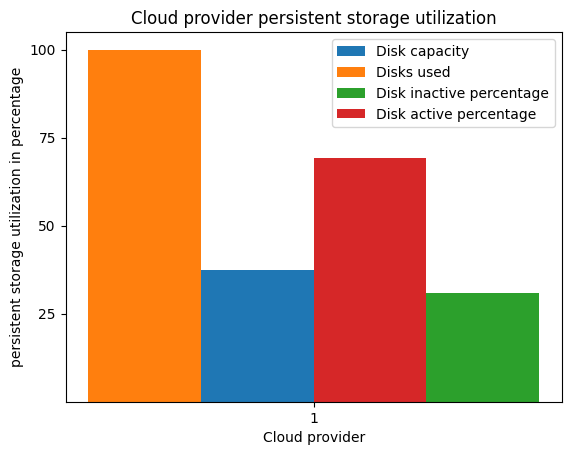

In [30]:
bar_width = 0.2
plt.bar(1 - bar_width * 0.25, np.mean(datacenter_used_storage_capacity)/np.mean(datacenter_total_storage_capacity)*100, bar_width/2, label="Disk capacity")
plt.bar(1 - bar_width * 0.75, np.mean(datacenter_disks_on)/np.mean(datacenter_disks)*100, bar_width/2, label="Disks used")
plt.bar(1 + bar_width * 0.75, np.mean(datacenter_inactive_duration)/np.mean(datacenter_total_duration)*100, bar_width/2, label="Disk inactive percentage")
plt.bar(1 + bar_width * 0.25, np.mean(datacenter_active_duration)/np.mean(datacenter_total_duration)*100, bar_width/2, label="Disk active percentage")
plt.xlabel("Cloud provider")
plt.ylabel("persistent storage utilization in percentage")
plt.xticks([1])
plt.yticks([25,50,75,100])
plt.title("Cloud provider persistent storage utilization")
plt.legend()
plt.savefig("../figs/storage/storage_utilization/cloud_provider_storage_utilization.eps", format="eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


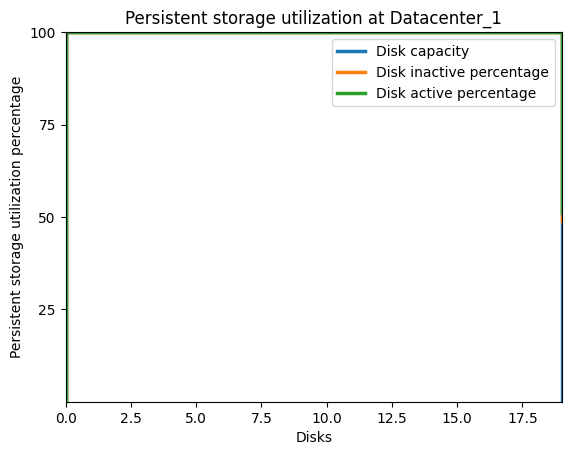

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


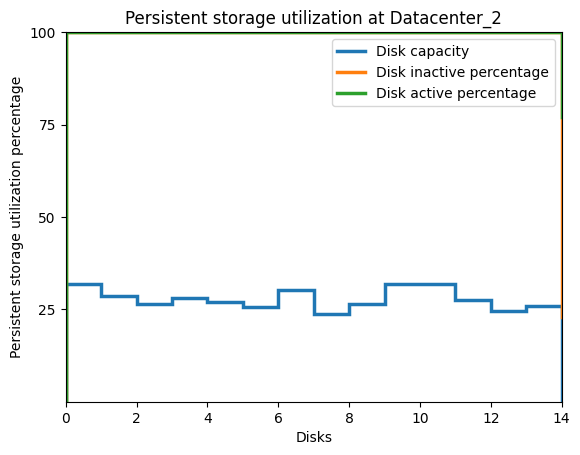

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


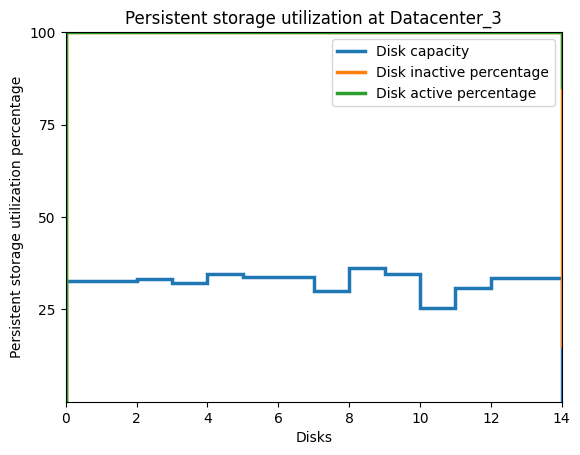

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


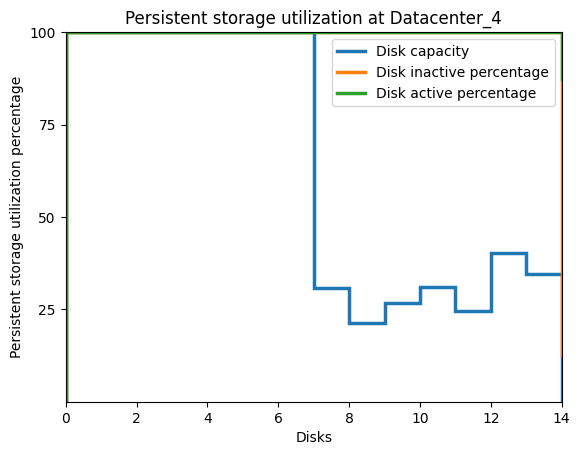

In [31]:
labels = np.unique(dataset['datacenter_name'])

for i in range(len(labels)):
    disk_capacity = np.array([])
    disk_capacity_used = np.array([])
    
    disk_total_duration = np.array([])
    disk_inactive_duration = np.array([])
    disk_active_duration = np.array([])
    
    for index, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        disk_capacity = np.append(disk_capacity, sample['storage_capacity'])
        disk_capacity_used = np.append(disk_capacity_used, sample['capacity_used'])
        
        # idle_duration = 0
        # for idle_interval in sample['idle_intervals'].split(":"):
        #     if idle_interval != '':
        #         idle_duration += float(idle_interval)
        
        disk_inactive_duration = np.append(disk_capacity, float(sample['duration']) - float(sample['active_duration']))
        disk_active_duration = np.append(disk_capacity, float(sample['active_duration']))
        disk_total_duration = np.append(disk_capacity, float(sample['duration']))
    
    fig, ax = plt.subplots()
    ax.stairs(np.divide(disk_capacity_used, disk_capacity)*100, linewidth=2.5, label="Disk capacity")
    ax.stairs(np.divide(disk_inactive_duration, disk_total_duration)*100, linewidth=2.5, label="Disk inactive percentage")
    ax.stairs(np.divide(disk_active_duration, disk_total_duration)*100, linewidth=2.5, label="Disk active percentage")
    ax.set(xlim=(0, len(disk_capacity_used)), ylim=(0,100), yticks=np.array([25,50,75,100])) #xticks=np.arange(1,len(host_availablePEs))
    plt.ylabel("Persistent storage utilization percentage")
    plt.xlabel("Disks")
    plt.title(f"Persistent storage utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.savefig(f"../figs/storage/storage_utilization/{sample['datacenter_name'].lower()}_storage_utilization.eps", format="eps")
    plt.show()
    

In [32]:
print(f"Out of the {np.sum(datacenter_disks)} total {np.sum(datacenter_disks_off)} are unused but powered on. (percent: {((np.sum(datacenter_disks_off))/np.sum(datacenter_disks))*100}%)")
print(f"Out of the {np.sum(datacenter_total_storage_capacity)} GB of disk space {np.sum(datacenter_used_storage_capacity)} GB is used. (percent: {((np.sum(datacenter_used_storage_capacity))/np.sum(datacenter_total_storage_capacity))*100}%)")
print(f"With a total active duration of all disks {np.sum(datacenter_active_duration)} out of a total duration between all disks {np.sum(datacenter_total_duration)}. (percent: {((np.sum(datacenter_active_duration))/np.sum(datacenter_total_duration))*100}%)")
print(f"With a total inactive duration of all disks {np.sum(datacenter_inactive_duration)} out of a total duration between all disks {np.sum(datacenter_total_duration)}. (percent: {((np.sum(datacenter_inactive_duration))/np.sum(datacenter_total_duration))*100}%)")


Out of the 61.0 total 0.0 are unused but powered on. (percent: 0.0%)
Out of the 217400000.0 GB of disk space 81367552.0 GB is used. (percent: 37.42757681692732%)
With a total active duration of all disks 398871.18168801564 out of a total duration between all disks 576303.3125173622. (percent: 69.21202308307033%)
With a total inactive duration of all disks 177432.13082934666 out of a total duration between all disks 576303.3125173622. (percent: 30.787976916929694%)


In [33]:
for index in range(len(labels)):
    print(f"---------- {labels[index]} ----------")
    print(f"Out of the {datacenter_disks[index]} total {datacenter_disks_off[index]} are unused but powered on. (percent: {((datacenter_disks_off[index])/datacenter_disks[index])*100}%)")
    print(f"Out of the {datacenter_total_storage_capacity[index]} GB of disk space {datacenter_used_storage_capacity[index]} GB is used. (percent: {((datacenter_used_storage_capacity[index])/datacenter_total_storage_capacity[index])*100}%)")
    print(f"With a total active duration of all disks {datacenter_active_duration[index]} out of a total duration between all disks {datacenter_total_duration[index]}. (percent: {((datacenter_active_duration[index])/datacenter_total_duration[index])*100}%)")
    print(f"With a total inactive duration of all disks {datacenter_inactive_duration[index]} out of a total duration between all disks {datacenter_total_duration[index]}. (percent: {((datacenter_inactive_duration[index])/datacenter_total_duration[index])*100}%)")
    print()



---------- Datacenter_1 ----------
Out of the 19.0 total 0.0 are unused but powered on. (percent: 0.0%)
Out of the 17100000.0 GB of disk space 17092096.0 GB is used. (percent: 99.95377777777777%)
With a total active duration of all disks 89847.52518543223 out of a total duration between all disks 179504.31045622763. (percent: 50.05312961960413%)
With a total inactive duration of all disks 89656.78527079539 out of a total duration between all disks 179504.31045622763. (percent: 49.94687038039586%)

---------- Datacenter_2 ----------
Out of the 14.0 total 0.0 are unused but powered on. (percent: 0.0%)
Out of the 84000000.0 GB of disk space 23350784.0 GB is used. (percent: 27.79855238095238%)
With a total active duration of all disks 110531.32381236718 out of a total duration between all disks 132266.3340203782. (percent: 83.56723926085202%)
With a total inactive duration of all disks 21735.010208011052 out of a total duration between all disks 132266.3340203782. (percent: 16.432760739147

In [34]:
print("Static:")
print(f"The maximum power consumption for the cloud provider is {np.sum(datacenter_max_power)}W")
print(f"The current power consumption for the cloud provider is {np.sum(datacenter_current_power)}W")
print(f"The cloud provider is saving {np.sum(datacenter_max_power) - np.sum(datacenter_current_power)}W")
print(f"The cloud provider is thus using {(np.sum(datacenter_current_power) / np.sum(datacenter_max_power)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(datacenter_max_power) - np.sum(datacenter_current_power)) / np.sum(datacenter_max_power)) * 100}% of their full power consumption.")
print(f"Duration {duration}:")
print(f"The maximum power consumption for the cloud provider is {np.sum(datacenter_max_power_duration)}W")
print(f"The current power consumption for the cloud provider is {np.sum(datacenter_current_power_duration)}W")
print(f"The cloud provider is saving {np.sum(datacenter_max_power_duration) - np.sum(datacenter_current_power_duration)}W")
print(f"The cloud provider is thus using {(np.sum(datacenter_current_power_duration) / np.sum(datacenter_max_power_duration)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(datacenter_max_power_duration) - np.sum(datacenter_current_power_duration)) / np.sum(datacenter_max_power_duration)) * 100}% of their full power consumption.")
print()
print("Static:")
print(f"The maximum energy consumption for the cloud provider is {(np.sum(datacenter_max_power) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(datacenter_current_power) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(datacenter_max_power) * 1) / 1000) - ((np.sum(datacenter_current_power) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(datacenter_current_power) * 1) / 1000) / ((np.sum(datacenter_max_power) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(datacenter_max_power) - np.sum(datacenter_current_power)) * 1) / 1000) / ((np.sum(datacenter_max_power) * 1) / 1000)) * 100}% energy (kJ/s).")
print(f"Duration {duration}:")
print(f"The maximum energy consumption for the cloud provider is {(np.sum(datacenter_max_power_duration) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(datacenter_current_power_duration) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(datacenter_max_power_duration) * 1) / 1000) - ((np.sum(datacenter_current_power_duration) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(datacenter_current_power_duration) * 1) / 1000) / ((np.sum(datacenter_max_power_duration) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(datacenter_max_power_duration) - np.sum(datacenter_current_power_duration)) * 1) / 1000) / ((np.sum(datacenter_max_power_duration) * 1) / 1000)) * 100}% energy (kJ/s).")

Static:
The maximum power consumption for the cloud provider is 545.73W
The current power consumption for the cloud provider is 545.73W
The cloud provider is saving 0.0W
The cloud provider is thus using 100.0% of their full power consumption.
The cloud provider is thus using 0.0% of their full power consumption.
Duration 9447.595287169874:
The maximum power consumption for the cloud provider is 5155836.176067214W
The current power consumption for the cloud provider is 4555603.335354972W
The cloud provider is saving 600232.8407122428W
The cloud provider is thus using 88.35818633069738% of their full power consumption.
The cloud provider is thus using 11.641813669302625% of their full power consumption.

Static:
The maximum energy consumption for the cloud provider is 0.54573kJ/s
The current energy consumption for the cloud provider is 0.54573kJ/s
The cloud provider is saving 0.0kJ/s
The cloud provider is thus using 100.0% of their full energy consumption (kJ/s).
The cloud provider is sa

In [35]:
for index in range(len(labels)):
    print(f"---------- {labels[index]} ----------")
    print("Static:")
    print(f"The maximum power consumption for the cloud provider is {datacenter_max_power[index]}W")
    print(f"The current power consumption for the cloud provider is {datacenter_current_power[index]}W")
    print(f"The cloud provider is saving {datacenter_max_power[index] - datacenter_current_power[index]}W")
    print(f"The cloud provider is thus using {(datacenter_current_power[index] / datacenter_max_power[index]) * 100}% of their full power consumption.")
    print(f"The cloud provider is thus using {((datacenter_max_power[index] - datacenter_current_power[index]) / datacenter_max_power[index]) * 100}% of their full power consumption.")
    print(f"Duration {duration}:")
    print(f"The maximum power consumption for the cloud provider is {datacenter_max_power_duration[index]}W")
    print(f"The current power consumption for the cloud provider is {datacenter_current_power_duration[index]}W")
    print(f"The cloud provider is saving {datacenter_max_power_duration[index] - datacenter_current_power_duration[index]}W")
    print(f"The cloud provider is thus using {(datacenter_current_power_duration[index] / datacenter_max_power_duration[index]) * 100}% of their full power consumption.")
    print(f"The cloud provider is thus using {((datacenter_max_power_duration[index] - datacenter_current_power_duration[index]) / datacenter_max_power_duration[index]) * 100}% of their full power consumption.")
    print()
    print("Static:")
    print(f"The maximum energy consumption for the cloud provider is {(datacenter_max_power[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the cloud provider is {(datacenter_current_power[index] * 1) / 1000}kJ/s")
    print(f"The cloud provider is saving {((datacenter_max_power[index] * 1) / 1000) - ((datacenter_current_power[index] * 1) / 1000)}kJ/s")
    print(f"The cloud provider is thus using {(((datacenter_current_power[index] * 1) / 1000) / ((datacenter_max_power[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The cloud provider is saving {((((datacenter_max_power[index] - datacenter_current_power[index]) * 1) / 1000) / ((datacenter_max_power[index] * 1) / 1000)) * 100}% energy (kJ/s).")
    print(f"Duration {duration}:")
    print(f"The maximum energy consumption for the cloud provider is {(datacenter_max_power_duration[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the cloud provider is {(datacenter_current_power_duration[index] * 1) / 1000}kJ/s")
    print(f"The cloud provider is saving {((datacenter_max_power_duration[index] * 1) / 1000) - ((datacenter_current_power_duration[index] * 1) / 1000)}kJ/s")
    print(f"The cloud provider is thus using {(((datacenter_current_power_duration[index] * 1) / 1000) / ((datacenter_max_power_duration[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The cloud provider is saving {((((datacenter_max_power_duration[index] - datacenter_current_power_duration[index]) * 1) / 1000) / ((datacenter_max_power_duration[index] * 1) / 1000)) * 100}% energy (kJ/s).")
    print()


---------- Datacenter_1 ----------
Static:
The maximum power consumption for the cloud provider is 110.19999999999999W
The current power consumption for the cloud provider is 110.19999999999999W
The cloud provider is saving 0.0W
The cloud provider is thus using 100.0% of their full power consumption.
The cloud provider is thus using 0.0% of their full power consumption.
Duration 9447.595287169874:
The maximum power consumption for the cloud provider is 1041125.0006461202W
The current power consumption for the cloud provider is 790086.001887893W
The cloud provider is saving 251038.99875822722W
The cloud provider is thus using 75.88771774739509% of their full power consumption.
The cloud provider is thus using 24.112282252604913% of their full power consumption.

Static:
The maximum energy consumption for the cloud provider is 0.11019999999999999kJ/s
The current energy consumption for the cloud provider is 0.11019999999999999kJ/s
The cloud provider is saving 0.0kJ/s
The cloud provider is